# NON-SEQUENTIAL MODEL using functional API

In [1]:
## importing important libraries and datasets
import pandas as pd
import numpy as np


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing() 


### Splitting training and testing data

In [3]:
## splitting training and testing data
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

## splitting validataion and training data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
## checking shape of imported dataset
print("X training:", X_train_full.shape)
print("y training:", y_train_full.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X training: (15480, 8)
y training: (15480,)
X test: (5160, 8)
y test: (5160,)


In [5]:
## checking datatype of imported dataset
print("X training datatype:", X_train_full.dtype)
print("y training datatype:", y_train_full.dtype)
print("X test datatype:", X_test.dtype)
print("y test datatype:", y_test.dtype)

X training datatype: float64
y training datatype: float64
X test datatype: float64
y test datatype: float64


In [6]:
## Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Building, Training and Evaluating the model

### I. Wide and Deep Neural Network

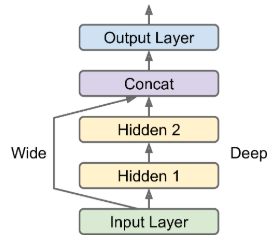

#### 1. Building the model

In [7]:
## First we have to import keras
import tensorflow as tf
from tensorflow import keras

In [8]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model =keras.Model(inputs =[input_], outputs = [output])

#### 2. Compiling the model

In [9]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')

#### 3. Fitting the model

In [12]:
housing_price = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 40us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [=================

#### 4. Evaluating the model

In [13]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### 5. Prediction on new instances

In [14]:
X_new = X_test[:3]
y_pred =model.predict(X_new)

In [15]:
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)